In [4]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-08-08 09:58:36--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  23.7MB/s    in 5.3s    

2023-08-08 09:58:44 (19.0 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
2+2


4

In [5]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

#resizing the all images in 3 folder

In [7]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


# checking the level in training data set
 this code snippet generates a 3x3 grid of subplots, displays 9 images from a batch of the training dataset, and annotates each image with its corresponding class label. The plt.show() command would typically be used after this code snippet to display the entire figure with the subplots.

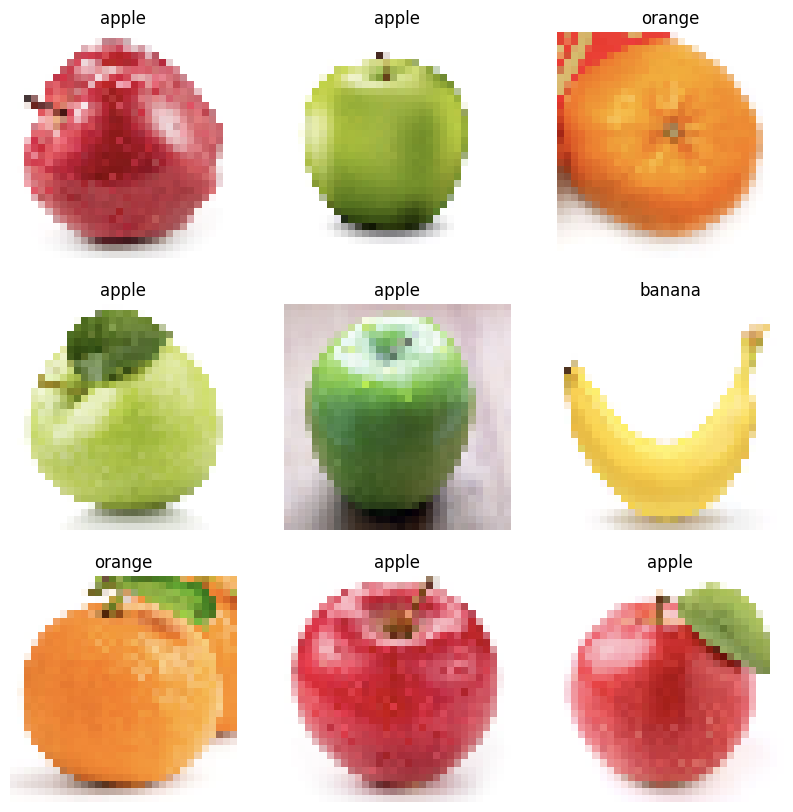

In [8]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Insight: training data set is properly lebeled



Build convolutional neural network (CNN) model using TensorFlow's Keras API. This model is designed for image classification tasks.
this model architecture follows a common pattern for image classification CNNs, gradually extracting features through convolutional and pooling layers, then transitioning to fully connected layers for classification

In [9]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [10]:
#COMPLIE THE MODEL, for multiclass sparsecatagory entropy
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [11]:
#fit the model with train and valid data,val_ds dataset contains a separate set of images and labels that the model will use for validation after each epoch.
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)


Epoch 1/10
23/23 [==============================] - 14s 56ms/step - loss: 0.9658 - accuracy: 0.5043 - val_loss: 0.7727 - val_accuracy: 0.7727
Epoch 2/10
23/23 [==============================] - 2s 48ms/step - loss: 0.6388 - accuracy: 0.7304 - val_loss: 0.5133 - val_accuracy: 0.7576
Epoch 3/10
23/23 [==============================] - 2s 49ms/step - loss: 0.4719 - accuracy: 0.7891 - val_loss: 0.4634 - val_accuracy: 0.7424
Epoch 4/10
23/23 [==============================] - 2s 53ms/step - loss: 0.3521 - accuracy: 0.8457 - val_loss: 0.3101 - val_accuracy: 0.8939
Epoch 5/10
23/23 [==============================] - 2s 50ms/step - loss: 0.2403 - accuracy: 0.9109 - val_loss: 0.2872 - val_accuracy: 0.8485
Epoch 6/10
23/23 [==============================] - 3s 101ms/step - loss: 0.1965 - accuracy: 0.9239 - val_loss: 0.1520 - val_accuracy: 0.9545
Epoch 7/10
23/23 [==============================] - 2s 48ms/step - loss: 0.1650 - accuracy: 0.9435 - val_loss: 0.3158 - val_accuracy: 0.8939
Epoch 8/10


In [12]:
#model evalution
model.evaluate(test_ds)

7/7 [==============================] - 0s 19ms/step - loss: 0.1841 - accuracy: 0.9462


[0.18407182395458221, 0.9461538195610046]

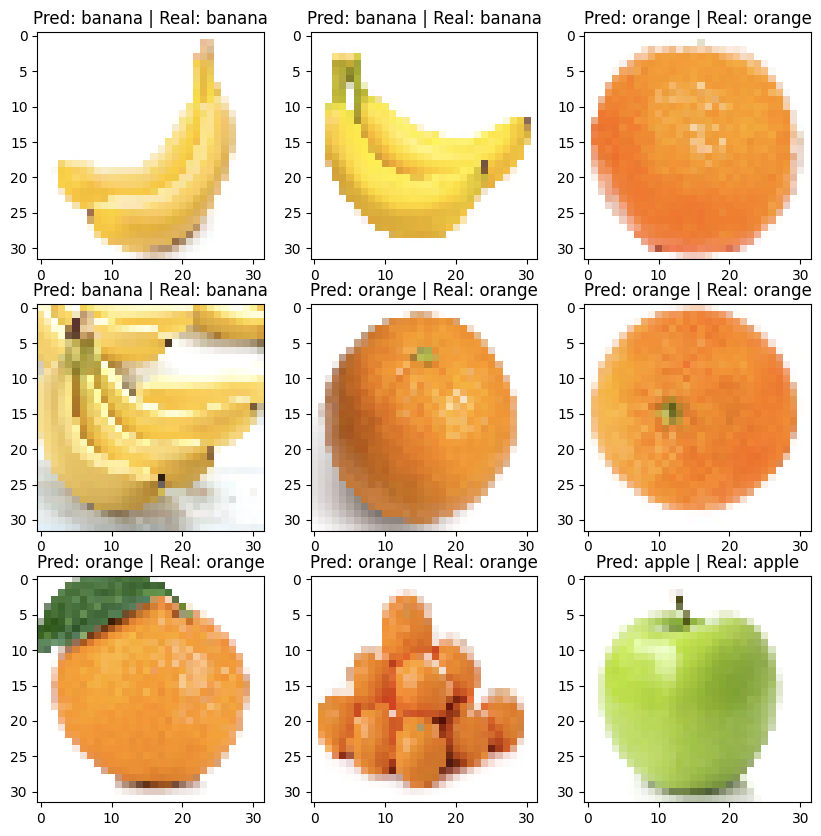

In [13]:
#visualizing the predictions made by a trained machine learning model on a batch of images from a test dataset with real current image
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [14]:
#convert a trained Keras model into a TensorFlow Lite (TFLite) model and save it to a file named "model.tflite".
#TensorFlow Lite is a framework for deploying machine learning models on resource-constrained devices.
#and sav the model as name(model.tflite)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)
